In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
fa_ml_df = pd.read_csv("food_access.csv", index_col=0, dtype={'StateFIPS': str})
fa_ml_df['CensusTract'] = fa_ml_df["CensusTract"].astype(str)
pd.set_option('display.max_columns', 35)
fa_ml_df.head(20)

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,01,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.31,5.33
1,01,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,4.10,7.19
2,01,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,1306.0,894.0,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,2.94,5.10
3,01,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,922.0,1015.0,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,0.48,2.23
4,01,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,2242.0,3162.0,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,2.14,3.15
5,01,1001020600,Alabama,Autauga County,1,3668,1311,21.6,69521.0,1,1659.0,1008.0,411.0,2751.0,740.0,9.0,1.0,10.0,157.0,176.0,71.0,224.0,45.23,27.48,11.21,75.00,20.17,0.25,0.03,0.27,4.28,4.80,1.94,6.11
6,01,1001020700,Alabama,Autauga County,1,2891,1188,30.5,39875.0,1,2175.0,686.0,360.0,2333.0,435.0,13.0,3.0,11.0,96.0,98.0,34.0,390.0,75.23,23.73,12.45,80.70,15.05,0.45,0.10,0.38,3.32,3.39,1.18,13.49
7,01,1001020801,Alabama,Autauga County,0,3081,1074,8.9,89423.0,0,527.0,815.0,341.0,2690.0,278.0,16.0,0.0,27.0,70.0,57.0,68.0,143.0,17.10,26.45,11.07,87.31,9.02,0.52,0.00,0.88,2.27,1.85,2.21,4.64
8,01,1001020802,Alabama,Autauga County,0,10435,3694,13.7,84833.0,0,3103.0,2909.0,1060.0,8744.0,1387.0,61.0,7.0,49.0,187.0,159.0,198.0,352.0,29.74,27.88,10.16,83.79,13.29,0.58,0.07,0.47,1.79,1.52,1.90,3.37
9,01,1001020900,Alabama,Autauga County,0,5675,2067,9.8,77865.0,0,1612.0,1511.0,630.0,4835.0,679.0,20.0,3.0,14.0,124.0,96.0,97.0,340.0,28.41,26.63,11.10,85.20,11.96,0.35,0.05,0.25,2.19,1.69,1.71,5.99


In [3]:
# calculate population / # of households in order to create a new column
fa_ml_df['Pop_per_household'] = fa_ml_df['Pop2010']/fa_ml_df['OHU2010']
fa_ml_df

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,01,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.31,5.33,2.759019
1,01,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,4.10,7.19,2.920592
2,01,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,1306.0,894.0,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,2.94,5.10,2.685510
3,01,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,922.0,1015.0,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,0.48,2.23,2.547038
4,01,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,2242.0,3162.0,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,2.14,3.15,2.637433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71777,56,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,765.0,884.0,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0,23.00,26.58,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,1.83,1.92,2.525437
71778,56,56043000301,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,774.0,674.0,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0,29.04,25.29,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,3.30,1.54,2.309359
71779,56,56043000302,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,789.0,614.0,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0,31.04,24.15,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,0.90,2.52,2.489716
71780,56,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,955.0,655.0,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0,28.82,19.76,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,1.42,1.03,2.506808


In [4]:
#list of columns to refer to during pre-processing and training
list(fa_ml_df.columns)

['StateFIPS',
 'CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'TractLOWI',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractAsian',
 'TractNHOPI',
 'TractAIAN',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP',
 'TractLOWI_PCT',
 'TractKids_PCT',
 'TractSeniors_PCT',
 'TractWhite_PCT',
 'TractBlack_PCT',
 'TractAsian_PCT',
 'TractNHOPI_PCT',
 'TractAIAN_PCT',
 'TractOMultir_PCT',
 'TractHispanic_PCT',
 'TractHUNV_PCT',
 'TractSNAP_PCT',
 'Pop_per_household']

In [5]:
#datatype check
fa_ml_df.dtypes

StateFIPS              object
CensusTract            object
State                  object
County                 object
Urban                   int64
Pop2010                 int64
OHU2010                 int64
PovertyRate           float64
MedianFamilyIncome    float64
LAhalfand10             int64
TractLOWI             float64
TractKids             float64
TractSeniors          float64
TractWhite            float64
TractBlack            float64
TractAsian            float64
TractNHOPI            float64
TractAIAN             float64
TractOMultir          float64
TractHispanic         float64
TractHUNV             float64
TractSNAP             float64
TractLOWI_PCT         float64
TractKids_PCT         float64
TractSeniors_PCT      float64
TractWhite_PCT        float64
TractBlack_PCT        float64
TractAsian_PCT        float64
TractNHOPI_PCT        float64
TractAIAN_PCT         float64
TractOMultir_PCT      float64
TractHispanic_PCT     float64
TractHUNV_PCT         float64
TractSNAP_

In [6]:
#doublecheck for null values

for column in fa_ml_df.columns:
    print(f"Column {column} has {fa_ml_df[column].isnull().sum()} null values")

Column StateFIPS has 0 null values
Column CensusTract has 0 null values
Column State has 0 null values
Column County has 0 null values
Column Urban has 0 null values
Column Pop2010 has 0 null values
Column OHU2010 has 0 null values
Column PovertyRate has 0 null values
Column MedianFamilyIncome has 0 null values
Column LAhalfand10 has 0 null values
Column TractLOWI has 0 null values
Column TractKids has 0 null values
Column TractSeniors has 0 null values
Column TractWhite has 0 null values
Column TractBlack has 0 null values
Column TractAsian has 0 null values
Column TractNHOPI has 0 null values
Column TractAIAN has 0 null values
Column TractOMultir has 0 null values
Column TractHispanic has 0 null values
Column TractHUNV has 0 null values
Column TractSNAP has 0 null values
Column TractLOWI_PCT has 0 null values
Column TractKids_PCT has 0 null values
Column TractSeniors_PCT has 0 null values
Column TractWhite_PCT has 0 null values
Column TractBlack_PCT has 0 null values
Column TractAsia

In [7]:
#summary stats on all columns in dataset to gain initial insights into data...
#supressed censusTract scientific notation to the 10th decimal place for ease of interpreting
pd.set_option('display.float_format', lambda x: f'{x:,.1f}')
fa_ml_df.describe(include='all')

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
count,71782,71782,71782,71782,"71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0","71,782.0"
unique,51,71782,51,1874,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,06,8014031200,California,Los Angeles County,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,7938,1,7938,2297,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,0.8,"4,279.3","1,622.0",15.1,"77,038.4",0.7,"1,394.4","1,032.1",560.1,"3,101.7",536.8,203.1,7.5,40.3,389.8,700.0,144.0,203.2,33.6,23.6,13.7,72.0,13.7,4.4,0.2,1.0,8.7,15.3,3.8,5.1,2.7
std,NaN,NaN,NaN,NaN,0.4,"1,939.3",714.9,11.5,"37,544.4",0.5,979.2,611.1,349.9,"1,788.1",889.4,436.8,45.4,177.7,529.9,"1,122.5",231.6,185.6,18.8,6.2,7.2,25.6,22.2,8.4,0.9,4.6,10.0,20.8,6.1,4.6,3.0
min,NaN,NaN,NaN,NaN,0.0,24.0,7.0,0.0,"2,499.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
25%,NaN,NaN,NaN,NaN,1.0,"2,922.0","1,118.0",6.5,"51,484.5",0.0,691.0,621.0,325.0,"1,872.0",43.0,17.0,0.0,7.0,86.0,89.0,37.0,69.0,19.3,20.4,9.2,58.5,1.1,0.5,0.0,0.2,2.3,2.4,0.9,1.8,2.4
50%,NaN,NaN,NaN,NaN,1.0,"4,027.0","1,533.0",12.0,"68,821.0",1.0,"1,172.0",930.0,500.0,"2,929.0",160.0,58.0,1.0,15.0,187.0,245.0,83.0,153.0,31.0,23.7,13.0,80.9,4.0,1.5,0.0,0.4,4.7,6.2,2.0,3.9,2.6
75%,NaN,NaN,NaN,NaN,1.0,"5,341.0","2,027.0",20.5,"93,870.8",1.0,"1,853.0","1,318.0",720.0,"4,130.0",609.0,190.0,5.0,33.0,451.0,756.0,169.0,283.0,45.3,27.1,16.7,92.2,14.6,4.3,0.1,0.8,10.6,18.1,4.3,7.1,2.9


In [8]:
#drop columns that don't contribute to the model
fa_ml_df_final= fa_ml_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
fa_ml_df_final

,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,11.3,"81,250.0",1,23.8,26.5,11.6,84.8,11.3,0.7,0.0,0.7,2.4,2.3,0.3,5.3,2.8
1,17.9,"49,000.0",1,37.0,27.9,9.9,40.9,56.1,0.2,0.0,0.2,2.5,3.5,4.1,7.2,2.9
2,15.0,"62,609.0",1,38.7,26.5,13.0,76.4,19.2,0.5,0.1,0.3,3.5,2.6,2.9,5.1,2.7
3,2.8,"70,607.0",1,21.0,23.1,20.6,93.2,4.4,0.4,0.1,0.2,1.7,1.9,0.5,2.2,2.5
4,15.2,"96,334.0",1,20.8,29.4,10.5,80.5,13.3,2.8,0.1,0.5,2.9,3.3,2.1,3.1,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71777,9.7,"67,254.0",1,23.0,26.6,17.8,93.4,0.2,0.5,0.0,0.8,5.2,9.3,1.8,1.9,2.5
71778,11.6,"64,152.0",1,29.0,25.3,15.0,89.2,0.2,0.9,0.0,1.5,8.3,16.7,3.3,1.5,2.3
71779,16.3,"69,605.0",1,31.0,24.1,20.3,91.0,0.4,0.4,0.0,1.0,7.2,16.0,0.9,2.5,2.5
71780,17.5,"74,500.0",1,28.8,19.8,15.1,95.9,0.5,0.3,0.0,1.4,1.9,2.8,1.4,1.0,2.5


In [15]:
#scale the data
X = fa_ml_df_final.drop('LAhalfand10', axis=1)
y = fa_ml_df_final['LAhalfand10']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

[ 9.67661191e-04  1.61263766e-06  2.03648599e-04  1.90518741e-03
  1.98524507e-03 -4.21841329e-04  2.36856521e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  7.74667001e-04
 -1.31776321e-02  0.00000000e+00  0.00000000e+00]


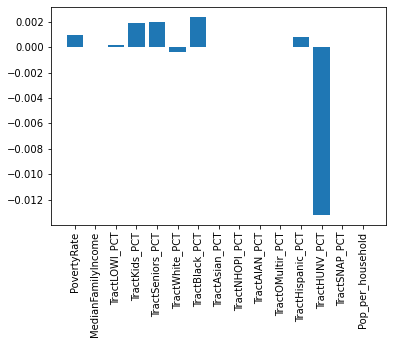

In [38]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.1).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.xticks(rotation ='vertical')
plt.show()

In [39]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7800624094505739


In [40]:
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [41]:
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      5645
           1       0.77      0.90      0.83     12301

    accuracy                           0.75     17946
   macro avg       0.71      0.66      0.67     17946
weighted avg       0.73      0.75      0.73     17946

Training Score: 0.7477710082472695
Testing Score: 0.7475203387941602


In [26]:
feature_importances = clf.feature_importances_

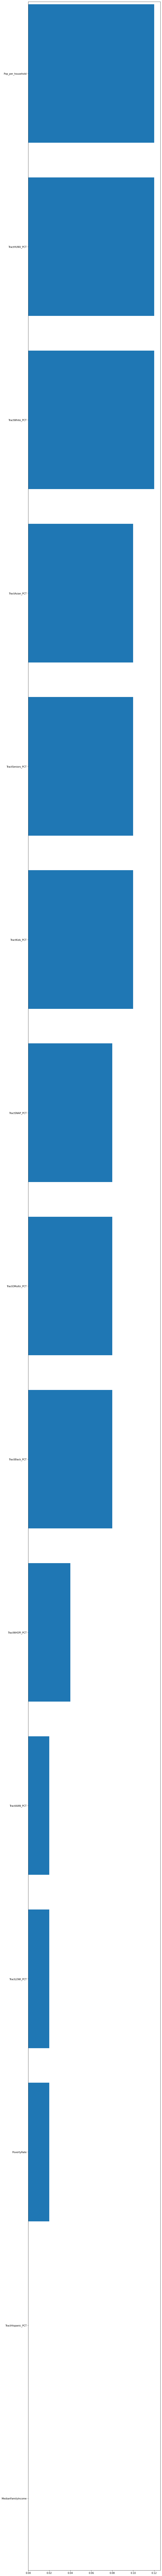

In [27]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()